# Problem 1- Determining Online Shoppers Purchasing Intention

### Import Required Libraries

In [38]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

### Load in Dataset | Perform Basic Preparation

In [2]:
df = pd.read_csv("./data/assignment_five/online_shoppers_intention.csv")
df['Weekend'] = df['Weekend'].astype(int)

df = pd.get_dummies(df[['VisitorType','Month']]).merge(
    df, left_index=True, right_index=True).drop(['VisitorType','Month'], axis=1)

In [9]:
X = df.loc[:, df.columns != 'Revenue']
y = df['Revenue']

# K-Means Clustering

In [4]:
# Testing different number of clusters (pseudo hyperparameter tuning)
clusters = [i*10 for i in range(1,5)]
for c in clusters:
    kmeans = KMeans(n_clusters=c, init='random', algorithm='elkan')
    kmeans.fit(X)
    print(silhouette_score(X, kmeans.labels_))

0.5169678042102415
0.4258450945812878
0.4040420042039299
0.3958225689460839


In [17]:
kmeans = KMeans(n_clusters=30, init='random', algorithm='elkan')
kmeans.fit(X)
train_predicted_clusters = kmeans.predict(X)
silhouette_score(X, kmeans.labels_)

0.3958614617937851

In [51]:
X['Cluster'] = train_predicted_clusters
X.head(10)

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,...,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Cluster
0,0,0,1,0,0,1,0,0,0,0,...,0.200000,0.200000,0.0,0.0,1,1,1,1,0,8
1,0,0,1,0,0,1,0,0,0,0,...,0.000000,0.100000,0.0,0.0,2,2,1,2,0,8
2,0,0,1,0,0,1,0,0,0,0,...,0.200000,0.200000,0.0,0.0,4,1,9,3,0,8
3,0,0,1,0,0,1,0,0,0,0,...,0.050000,0.140000,0.0,0.0,3,2,2,4,0,8
4,0,0,1,0,0,1,0,0,0,0,...,0.020000,0.050000,0.0,0.0,3,3,1,4,1,7
5,0,0,1,0,0,1,0,0,0,0,...,0.015789,0.024561,0.0,0.0,2,2,1,3,0,11
6,0,0,1,0,0,1,0,0,0,0,...,0.200000,0.200000,0.0,0.4,2,4,3,3,0,8
7,0,0,1,0,0,1,0,0,0,0,...,0.200000,0.200000,0.0,0.0,1,2,1,5,1,8
8,0,0,1,0,0,1,0,0,0,0,...,0.000000,0.100000,0.0,0.8,2,2,2,3,0,8
9,0,0,1,0,0,1,0,0,0,0,...,0.000000,0.022222,0.0,0.4,2,4,1,2,0,25


# Cluster Analysis

In [52]:
kmeans.cluster_centers_[1]

array([ 3.47133758e-01,  3.18471338e-03,  6.49681529e-01,  5.41401274e-02,
        1.65605096e-01, -1.90819582e-17,  4.14012739e-02,  6.36942675e-03,
        1.65605096e-01,  2.10191083e-01,  1.49681529e-01,  1.14649682e-01,
        9.23566879e-02,  5.34394904e+00,  2.54731101e+02,  6.24203822e-01,
        3.03436837e+01,  1.09299363e+01,  2.57489820e+02,  8.72376860e-03,
        2.59646259e-02,  2.71633591e+00,  1.84713376e-02,  2.08917197e+00,
        2.00955414e+00,  3.34394904e+00,  4.08280255e+00,  2.61146497e-01,
        2.61751592e+01])

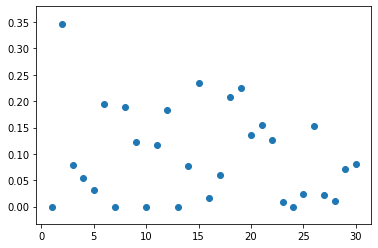

In [46]:
kmeans.labels_
test = [kmeans.cluster_centers_[i][0] for i in range(len(kmeans.cluster_centers_))]
length = [i for i in range(1,len(kmeans.cluster_centers_)+1)]
plt.scatter(length,test)

# Predict Target Value

### DecisionTreeClassifier

In [53]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
decision_tree_prediction = decision_tree.predict(X)

In [55]:
decision_tree_prediction.sum()

1908

(12330, 29)